In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
#I downloaded the dataset from kaggle,its divided into two parts train and test. So we read both the data and after that merge it together

In [3]:
df=pd.read_csv("D:/Self Data Science learning/ML/train.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
df.shape

(550068, 12)

In [5]:
df1=pd.read_csv("D:/Self Data Science learning/ML/test.csv")
df1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [6]:
#now we merge both the dataset using append function and store its to another variable named data

In [7]:
data=df.append(df1)
data.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10892\264224432.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=df.append(df1)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [8]:
data.shape

(783667, 12)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [10]:
#here we see that user id there is no need of it so we delete it.

In [11]:
data.drop(['User_ID'] ,axis=1,inplace=True)            #inplace changed the value in original data

In [12]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
#there are some categorical column, our machine did not understand categorical that's why we chang it into numerical

In [14]:
data["Gender"]=data["Gender"].map({"F":0,"M":1})
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [15]:
#there is another categorical column named Age. first we find unique value then we will convert it into numerical format
data["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:
data['Age'] = data['Age'].map({'0-17': 1,'18-25': 2, '26-35':3 ,'36-45': 4, '46-50' : 5, '51-55' : 6, '55+': 7})
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [17]:
data["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [18]:
data["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [19]:
city_name = pd.get_dummies(data['City_Category'],drop_first=True)
data= pd.concat([data,city_name],axis=1)
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [20]:
#now we remove city_category
data=data.drop(["City_Category"], axis=1)
data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [21]:
data["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [22]:
data["Stay_In_Current_City_Years"].value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [24]:
#here we conver 4+ to 4
data["Stay_In_Current_City_Years"]=data["Stay_In_Current_City_Years"].str.replace("+","")
data["Stay_In_Current_City_Years"].value_counts()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10892\4032477630.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Stay_In_Current_City_Years"]=data["Stay_In_Current_City_Years"].str.replace("+","")


1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [23]:
#now we check null values
data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [25]:
#now we focus on replacing missing values

In [28]:
#now we try to understand the value that are present in "Product_Category_2"
data["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [27]:
#after apply unique function we know that the values is discreate continuous

In [29]:
#now we figure out that how many times value comes
data["Product_Category_2"].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [30]:
#now we replace missing values with mode

In [31]:
data["Product_Category_2"].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [32]:
#here we are getting two values 0 and 8 we need to pick up 8
data["Product_Category_2"].mode()[0]

8.0

In [33]:
data["Product_Category_2"]=data["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])
data["Product_Category_2"].isnull().sum()

0

In [34]:
#now we try to understand the value that are present in "Product_Category_3"

In [35]:
data["Product_Category_3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [36]:
#now we figure out that how many times value comes
data["Product_Category_3"].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [37]:
data["Product_Category_3"].mode()

0    16.0
Name: Product_Category_3, dtype: float64

In [38]:
data["Product_Category_3"].mode()[0]

16.0

In [39]:
data["Product_Category_3"]=data["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])

In [40]:
data["Product_Category_3"].isnull().sum()

0

In [41]:
data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [44]:
#here we see that Stay_In_Current_City_Years showing object so we have to convert it into int

In [45]:
data["Stay_In_Current_City_Years"]=data["Stay_In_Current_City_Years"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.

In [46]:
data["B"]=data["B"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(2), int64(5), object(1), uint8(1)
memory usage: 66.

In [49]:
data["C"]=data["C"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


# Variable Identification¶

In [50]:
# We have to predict the purchae so our target(Output) variable will be "purchase" 
# and remaiming columns will be Predictors(Input variables)
y = targets = data["Purchase"]
X = predictors =data.drop(["Purchase"],axis=1)

In [51]:
X.shape

(783667, 11)

In [52]:
y.shape

(783667,)

In [53]:
# Print the Target and Input Variables
print("Input Variables", list(X.columns))
print("\nOutput Variable", "['Purchase']")

Input Variables ['Product_ID', 'Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'B', 'C']

Output Variable ['Purchase']


# Univariate Analysis

In [55]:
# Run discriptive statistics of numerical datatypes.
data.describe()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
count,783667.00000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,550068.000000,783667.000000,783667.000000
mean,0.75291,3.496802,8.079300,1.858247,0.409777,5.366196,9.265541,14.988858,9263.968713,0.420764,0.310954
std,0.43132,1.352736,6.522206,1.288790,0.491793,3.878160,4.301427,2.740792,5023.065394,0.493682,0.462884
min,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,0.000000,0.000000
25%,1.00000,3.000000,2.000000,1.000000,0.000000,1.000000,8.000000,16.000000,5823.000000,0.000000,0.000000
50%,1.00000,3.000000,7.000000,2.000000,0.000000,5.000000,8.000000,16.000000,8047.000000,0.000000,0.000000
75%,1.00000,4.000000,14.000000,3.000000,1.000000,8.000000,14.000000,16.000000,12054.000000,1.000000,1.000000
max,1.00000,7.000000,20.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,1.000000,1.000000


### Visualization

In [58]:
data.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


<Axes: xlabel='Gender', ylabel='count'>

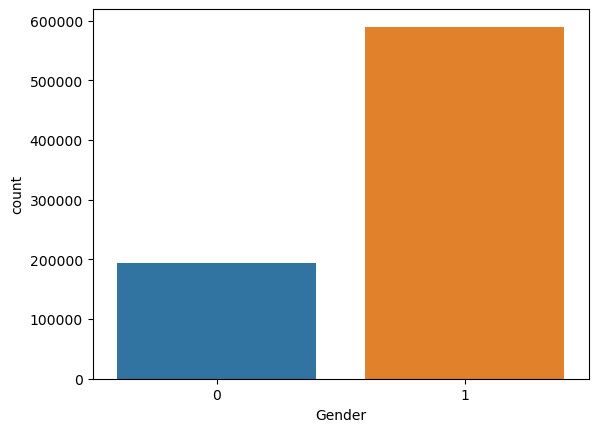

In [56]:
sns.countplot(x='Gender',data=data)

In [57]:
#here we see that female is less than male        female=0, Male=1

In [74]:
Gen=[["Female",0],["Male",1]]
Gender=pd.DataFrame(Gen,columns=["Gender","Value"])
Gender

,Gender,Value
0,Female,0
1,Male,1


<Axes: xlabel='Age', ylabel='count'>

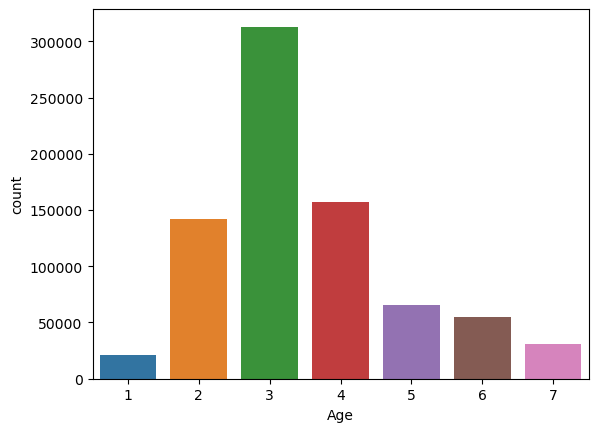

In [59]:
sns.countplot(x='Age',data=data)

In [64]:
#here we create a dataframe so we easily find the value of age
Age_data = [['0-17',1],['18-25',2],['26-35',3] ,['36-45',4], ['46-50',5], ['51-55',6], ['55+',7]]
Age = pd.DataFrame(Age_data, columns=['Original_Age', 'Value'])
Age

,Original_Age,Value
0,0-17,1
1,18-25,2
2,26-35,3
3,36-45,4
4,46-50,5
5,51-55,6
6,55+,7


In [65]:
#In this graph we clearly see that people between age 26-35 purchase more

<Axes: xlabel='Occupation', ylabel='count'>

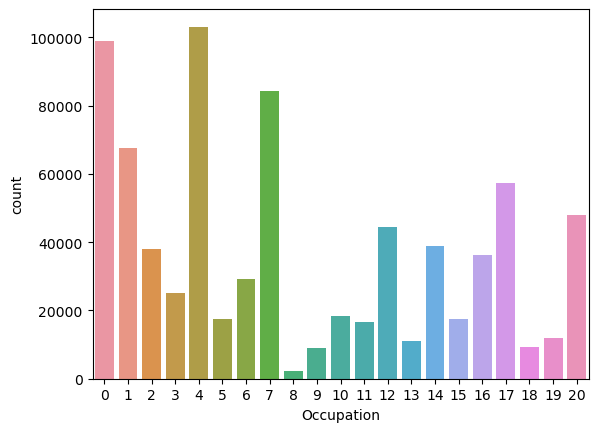

In [66]:
sns.countplot(x='Occupation',data=data)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

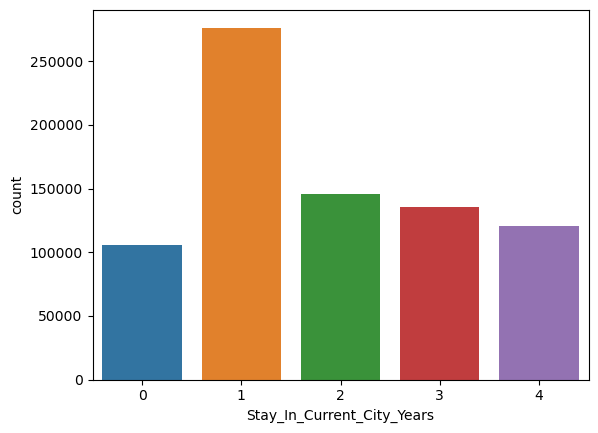

In [67]:
sns.countplot(x='Stay_In_Current_City_Years',data=data)

In [68]:
#people who completed one year are more than others

<Axes: xlabel='Marital_Status', ylabel='count'>

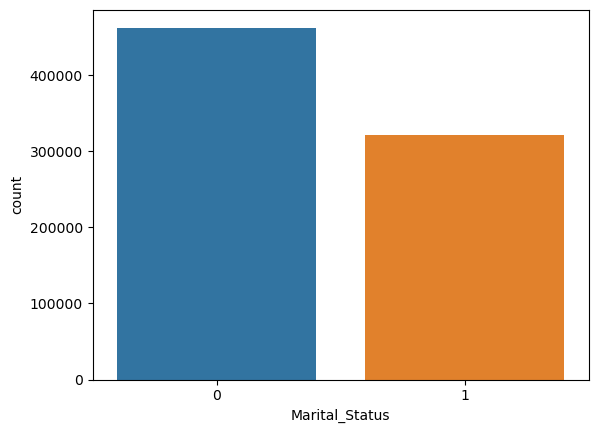

In [70]:
sns.countplot(x='Marital_Status',data=data)

# Bivariate Analysis

<Axes: xlabel='Age', ylabel='Purchase'>

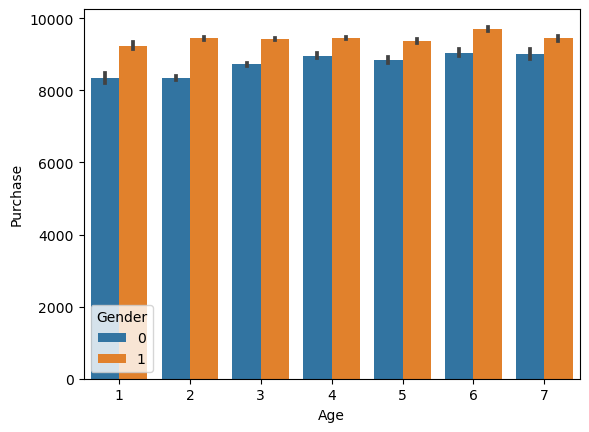

In [71]:
sns.barplot(x='Age',y='Purchase',hue='Gender',data = data)

In [75]:
Gender

,Gender,Value
0,Female,0
1,Male,1


In [78]:
Age

,Original_Age,Value
0,0-17,1
1,18-25,2
2,26-35,3
3,36-45,4
4,46-50,5
5,51-55,6
6,55+,7


In [79]:
#According to this graph men purchasing more than women and male who are 55+ purchase little more

<Axes: xlabel='Occupation', ylabel='Purchase'>

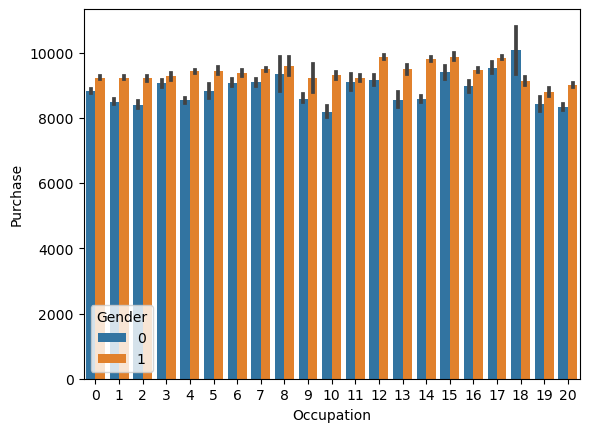

In [80]:
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data = data)

In [81]:
#this graph is quite uniform

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

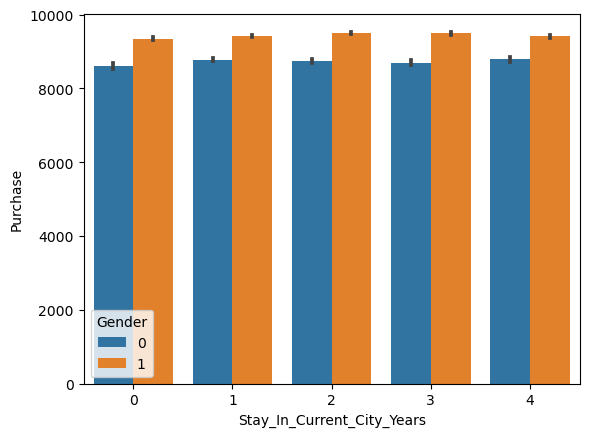

In [82]:
sns.barplot(x='Stay_In_Current_City_Years',y='Purchase',hue='Gender',data = data)

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

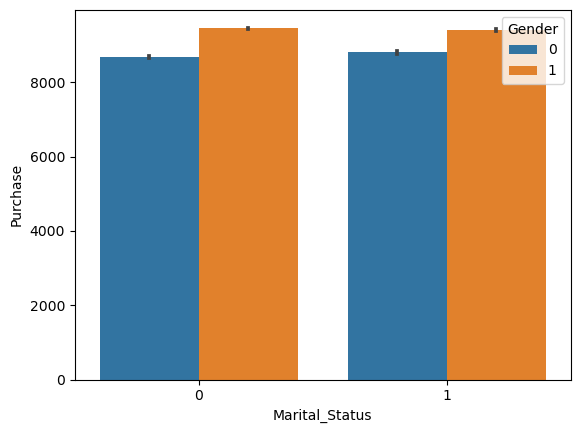

In [85]:
sns.barplot(x='Marital_Status',y='Purchase',hue="Gender",data = data)

In [86]:
#this is almost uniform

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

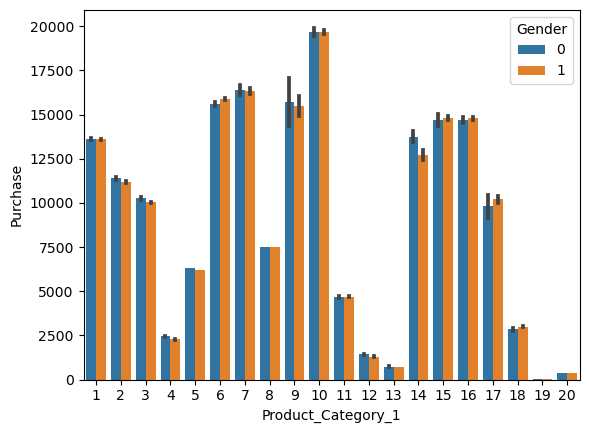

In [89]:
sns.barplot(x='Product_Category_1',y='Purchase',hue="Gender",data = data)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

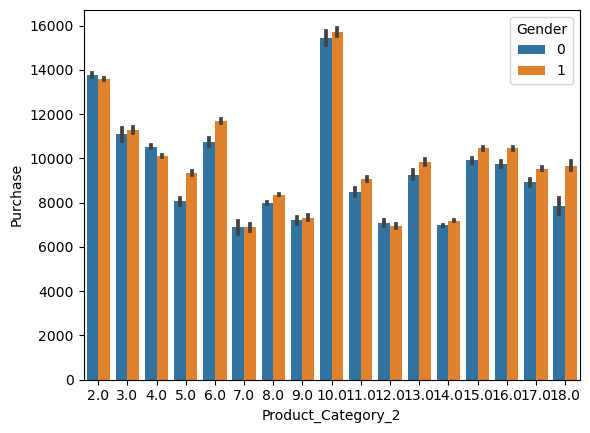

In [90]:
sns.barplot(x='Product_Category_2',y='Purchase',hue="Gender",data = data)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

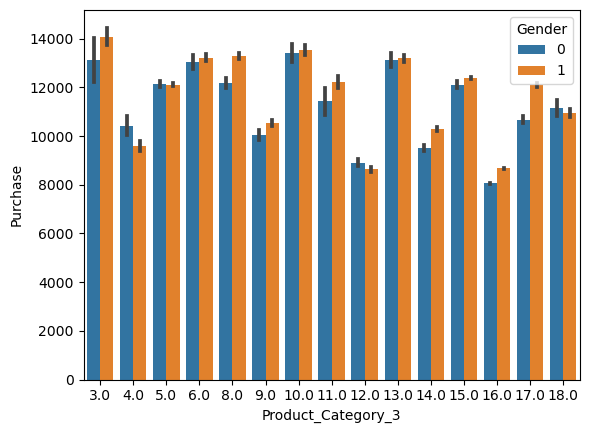

In [91]:
sns.barplot(x='Product_Category_3',y='Purchase',hue="Gender",data = data)

<Axes: xlabel='B', ylabel='Purchase'>

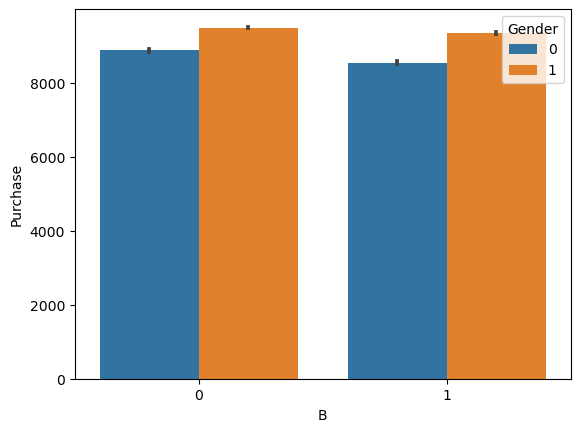

In [95]:
sns.barplot(x='B',y='Purchase',hue="Gender",data = data)

<Axes: xlabel='C', ylabel='Purchase'>

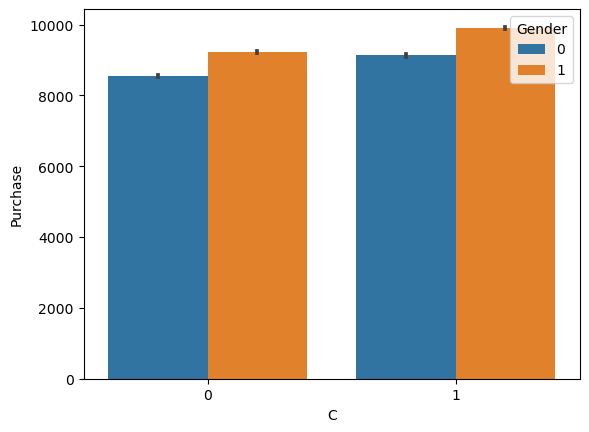

In [96]:
sns.barplot(x='C',y='Purchase',hue="Gender",data = data)

In [97]:
#we do not want product id so we drop it
data=data.drop(["Product_ID"],axis=1)

In [98]:
data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [99]:
data["Purchase"].isnull().sum()

233599

# Bivariate Analysis

In [101]:
corrrelation_matrix = data.corr()

In [102]:
corrrelation_matrix

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
Gender,1.000000,-0.004758,0.116505,0.015026,-0.010945,-0.046208,-0.011851,-0.006651,0.060346,-0.005399,-0.000180
Age,-0.004758,1.000000,0.090882,-0.004968,0.310747,0.060336,0.041716,0.036721,0.015839,-0.016881,0.110302
Occupation,0.116505,0.090882,1.000000,0.028488,0.023563,-0.008441,0.001501,-0.001576,0.020833,-0.011721,0.035255
Stay_In_Current_City_Years,0.015026,-0.004968,0.028488,1.000000,-0.012871,-0.003518,-0.000081,-0.000308,0.005422,0.011011,0.011007
Marital_Status,-0.010945,0.310747,0.023563,-0.012871,1.000000,0.019579,0.012192,0.013808,-0.000463,-0.002804,0.034377
Product_Category_1,-0.046208,0.060336,-0.008441,-0.003518,0.019579,1.000000,0.286502,0.319209,-0.343703,-0.003863,-0.012870
Product_Category_2,-0.011851,0.041716,0.001501,-0.000081,0.012192,0.286502,1.000000,0.463528,-0.128651,-0.003944,-0.000443
Product_Category_3,-0.006651,0.036721,-0.001576,-0.000308,0.013808,0.319209,0.463528,1.000000,-0.185945,0.004291,-0.020687
Purchase,0.060346,0.015839,0.020833,0.005422,-0.000463,-0.343703,-0.128651,-0.185945,1.000000,-0.019098,0.061012
B,-0.005399,-0.016881,-0.011721,0.011011,-0.002804,-0.003863,-0.003944,0.004291,-0.019098,1.000000,-0.572552


In [103]:
#lets visualize this using heat map

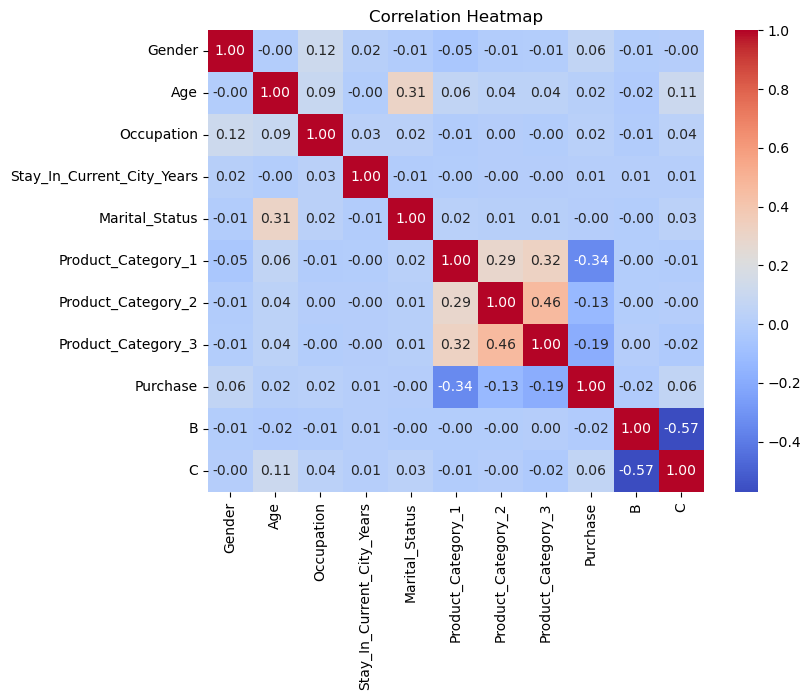

In [104]:
plt.figure(figsize=(8, 6))
sns.heatmap(corrrelation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [128]:
#split the train and test data

In [107]:
data_test=data[data['Purchase'].isnull()]

In [108]:
data_test.shape

(233599, 11)

In [109]:
data_test.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [110]:
data_train=data[~data['Purchase'].isnull()]

In [111]:
data_train.shape

(550068, 11)

In [112]:
data_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [118]:
#split the data

In [120]:
X1=data_train.drop(["Purchase"],axis=1)


In [121]:
y1=data_train["Purchase"]

In [123]:
X1.shape

(550068, 10)

In [124]:
y1.shape

(550068,)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [126]:
len(X_train),len(y_train)

(440054, 440054)

In [127]:
len(X_test),len(y_test)

(110014, 110014)

In [129]:
### Feature Scaling
## for this we are using standard scalar methods X_scaled = (X - mean(X)) / std(X)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# Linear Regression model

In [130]:
lr=LinearRegression()

In [131]:
lr.fit(X_train,y_train)

LinearRegression()

In [132]:
# m values 
lr.coef_

array([  224.82801154,   162.13523104,    40.95016485,    11.94794785,
         -25.44245483, -1587.94541555,    -7.86954243,  -424.48723499,
          76.43234381,   306.90710128])

In [133]:
# m values 
lr.intercept_

9266.733955378204

In [134]:
y_train_predctions=lr.predict(X_train)

In [135]:
#accuracy
print(f'train accuracy : {r2_score(y_train,y_train_predctions)}')

train accuracy : 0.13146127832240473


In [136]:
#loss
print(f'train accuracy : {1-r2_score(y_train,y_train_predctions)}')

train accuracy : 0.8685387216775953


In [137]:
#For train data
y_test_predctions=lr.predict(X_test)

In [138]:
#accuracy
print(f'test accuracy : {r2_score(y_test,y_test_predctions)}')

test accuracy : 0.13039017555086907


In [139]:
#loss
print(f'test accuracy : {1-r2_score(y_test,y_test_predctions)}')

test accuracy : 0.8696098244491309


In [ ]:
# Calculate the squared errors
Squared_errrors = (y_test_predctions- y_test) **2

mse =  np.mean(Squared_errrors)

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)